In [173]:
# Importing the neccessary dependency and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [174]:
!pip install pandas numpy seaborn scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [175]:
import zipfile

with zipfile.ZipFile('database.csv.zip', 'r') as zip_ref: # Use zipfile.ZipFile to open the zip file in read mode ('r')
    zip_ref.extractall() # Call the extractall method on the ZipFile object

In [176]:
df = pd.read_csv('database.csv')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [178]:
df.shape

(23412, 21)

In [179]:
df.isna().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [180]:
df_missing = df.isna().sum().reset_index(name='missing_values')
df_missing

,index,missing_values
0,Date,0
1,Time,0
2,Latitude,0
3,Longitude,0
4,Type,0
5,Depth,0
6,Depth Error,18951
7,Depth Seismic Stations,16315
8,Magnitude,0
9,Magnitude Type,3


In [181]:
df_missing['percent_missing'] = df_missing['missing_values'] / len(df) * 100
df_missing

,index,missing_values,percent_missing
0,Date,0,0.000000
1,Time,0,0.000000
2,Latitude,0,0.000000
3,Longitude,0,0.000000
4,Type,0,0.000000
5,Depth,0,0.000000
6,Depth Error,18951,80.945669
7,Depth Seismic Stations,16315,69.686486
8,Magnitude,0,0.000000
9,Magnitude Type,3,0.012814


In [182]:
df_missing[df_missing['percent_missing'] > 60.0]['index'].values

array(['Depth Error', 'Depth Seismic Stations', 'Magnitude Error',
       'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error'], dtype=object)

In [183]:
columns_to_drop = df_missing[df_missing['percent_missing'] > 60.0]['index'].values.tolist()
columns_to_drop

['Depth Error',
 'Depth Seismic Stations',
 'Magnitude Error',
 'Magnitude Seismic Stations',
 'Azimuthal Gap',
 'Horizontal Distance',
 'Horizontal Error']

In [184]:
for col in columns_to_drop:
    df.drop(col, axis=1, inplace=True)

In [185]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


#Data Visualization

In [186]:
#import necessary library
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [187]:
df.Type.value_counts()

Type
Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: count, dtype: int64

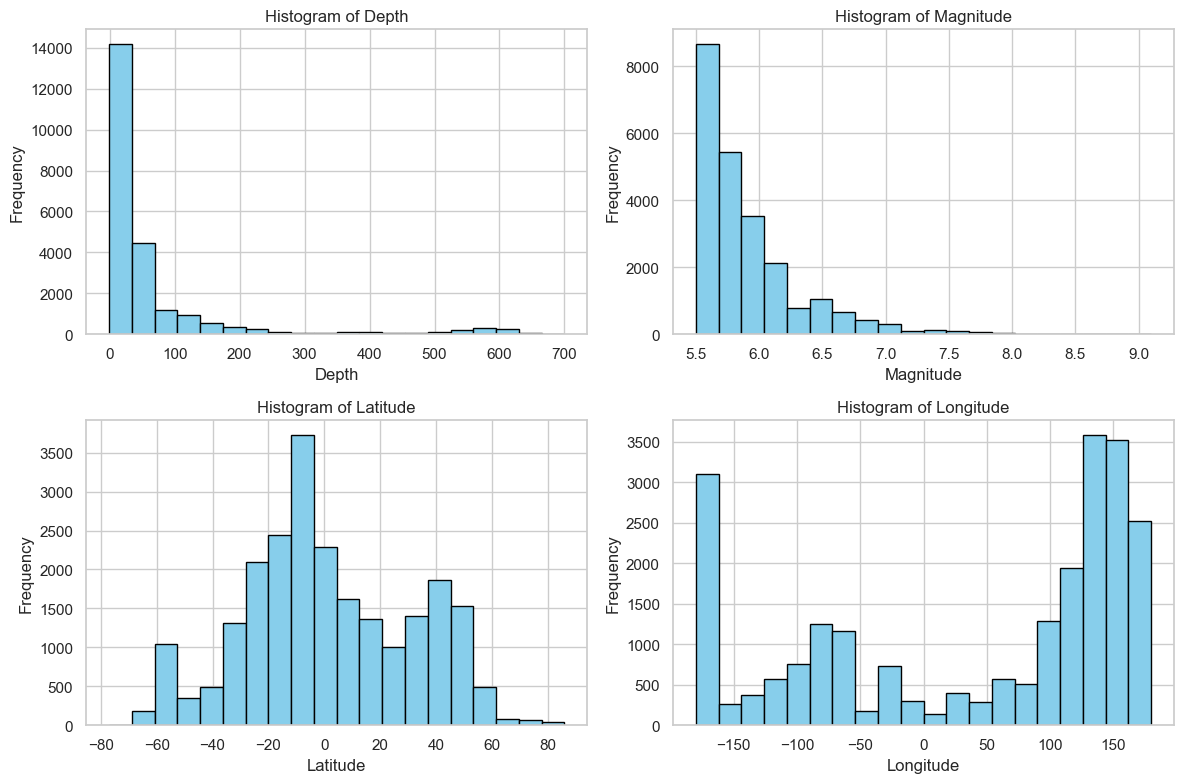

In [188]:
import matplotlib.pyplot as plt

def plot_histograms(df, columns):
    plt.figure(figsize=(12, 8))
    #The enumerate function starts with index 0 by default.
    for i, column in enumerate(columns):
        #Remove the +1 to the index.
        plt.subplot(2, 2, i + 1)
        df[column].hist(bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.tight_layout()
    plt.show()

numeric_columns = ['Depth', 'Magnitude', 'Latitude', 'Longitude']
plot_histograms(df, numeric_columns)

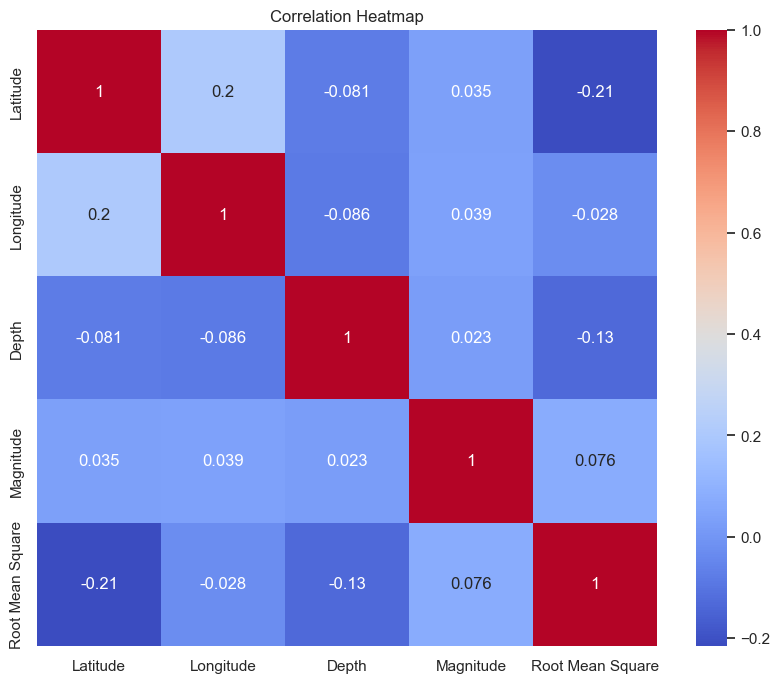

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(df):
  plt.figure(figsize=(10, 8))
  # Calculate the correlation matrix, considering only numeric columns
  sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
  plt.title('Correlation Heatmap')
  plt.show()

plot_correlation_heatmap(df)

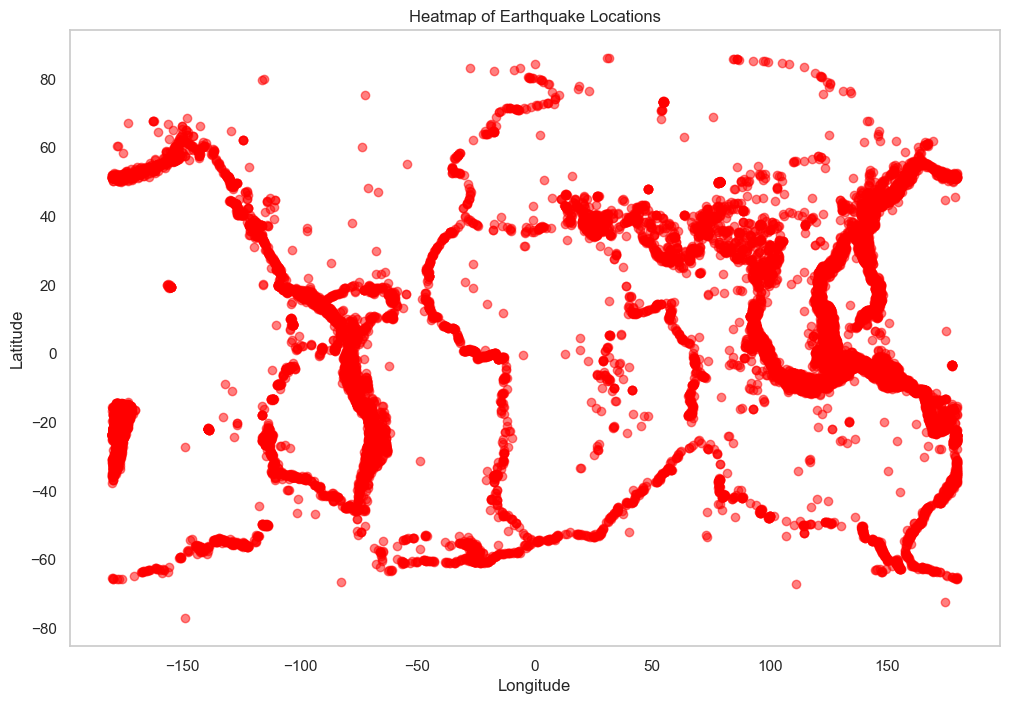

In [190]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Longitude'], df['Latitude'], c='red', alpha=0.5)
plt.title('Heatmap of Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()


In [191]:
df.corr(numeric_only=True)

,Latitude,Longitude,Depth,Magnitude,Root Mean Square
Latitude,1.000000,0.203546,-0.081020,0.034987,-0.214762
Longitude,0.203546,1.000000,-0.085861,0.038579,-0.028061
Depth,-0.081020,-0.085861,1.000000,0.023457,-0.134002
Magnitude,0.034987,0.038579,0.023457,1.000000,0.075865
Root Mean Square,-0.214762,-0.028061,-0.134002,0.075865,1.000000


In [192]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude',
       'Magnitude Type', 'Root Mean Square', 'ID', 'Source', 'Location Source',
       'Magnitude Source', 'Status'],
      dtype='object')

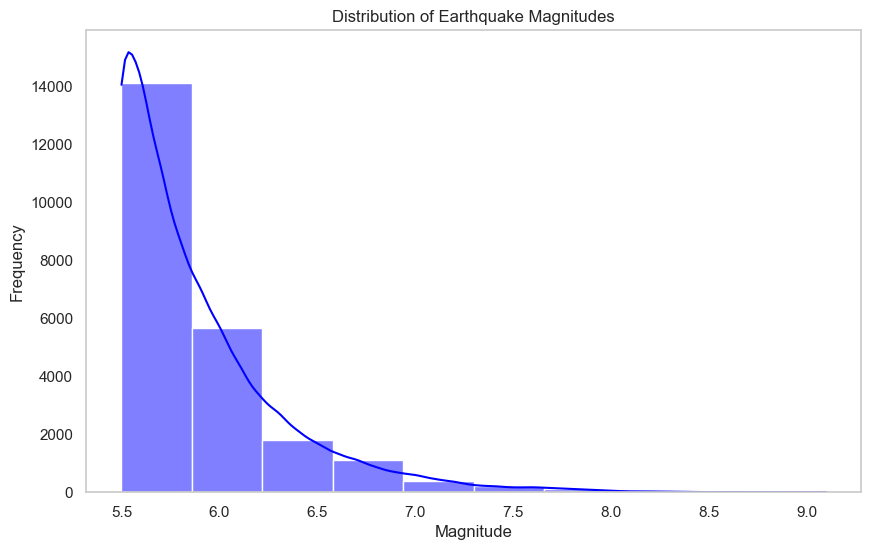

In [193]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Magnitude'], bins=10, kde=True, color='blue')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [194]:
# Convert 'Root Mean Square' column to numeric type, coercing errors to NaN
df["Root Mean Square"] = pd.to_numeric(df["Root Mean Square"], errors='coerce')

# Calculate the mean of the 'Root Mean Square' column
mean_rms = df["Root Mean Square"].mean()

# Fill NaN values in 'Root Mean Square' with the calculated mean
df["Root Mean Square"].fillna(mean_rms, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13464\258676638.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23412 non-null  object 
 1   Time              23412 non-null  object 
 2   Latitude          23412 non-null  float64
 3   Longitude         23412 non-null  float64
 4   Type              23412 non-null  object 
 5   Depth             23412 non-null  float64
 6   Magnitude         23412 non-null  float64
 7   Magnitude Type    23409 non-null  object 
 8   Root Mean Square  23412 non-null  float64
 9   ID                23412 non-null  object 
 10  Source            23412 non-null  object 
 11  Location Source   23412 non-null  object 
 12  Magnitude Source  23412 non-null  object 
 13  Status            23412 non-null  object 
dtypes: float64(5), object(9)
memory usage: 2.5+ MB


In [196]:
# Combine and convert 'Date' and 'Time' to datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

In [197]:
df['Datetime']

0       1965-01-02 13:44:18
1       1965-01-04 11:29:49
2       1965-01-05 18:05:58
3       1965-01-08 18:49:43
4       1965-01-09 13:32:50
                ...        
23407   2016-12-28 08:22:12
23408   2016-12-28 09:13:47
23409   2016-12-28 12:38:51
23410   2016-12-29 22:30:19
23411   2016-12-30 20:08:28
Name: Datetime, Length: 23412, dtype: datetime64[ns]

In [198]:
# Drop the original columns if no longer needed
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [199]:
df.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Datetime
0,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18
1,1.863,127.352,Earthquake,80.0,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49
2,-20.579,-173.972,Earthquake,20.0,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58
3,-59.076,-23.557,Earthquake,15.0,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43
4,11.938,126.427,Earthquake,15.0,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50


In [200]:
df.drop('ID', axis=1, inplace=True)

In [201]:
df.isna().sum()

Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      3
Root Mean Square    0
Source              0
Location Source     0
Magnitude Source    0
Status              0
Datetime            3
dtype: int64

In [202]:
df.dropna(inplace=True, axis=0)

In [203]:
df.isna().sum()

Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
Root Mean Square    0
Source              0
Location Source     0
Magnitude Source    0
Status              0
Datetime            0
dtype: int64

In [204]:
df.shape

(23406, 12)

In [205]:
df.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Datetime
0,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18
1,1.863,127.352,Earthquake,80.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49
2,-20.579,-173.972,Earthquake,20.0,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58
3,-59.076,-23.557,Earthquake,15.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43
4,11.938,126.427,Earthquake,15.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50


In [206]:
df.drop('Datetime', axis=1, inplace=True)

In [207]:
from sklearn.preprocessing import OneHotEncoder


In [208]:
df['Status'] = df['Status'].apply(lambda x: 1 if x == 'Reviewed' else 0)

In [209]:
df.columns

Index(['Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude', 'Magnitude Type',
       'Root Mean Square', 'Source', 'Location Source', 'Magnitude Source',
       'Status'],
      dtype='object')

In [210]:
df.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0
1,1.863,127.352,Earthquake,80.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0
2,-20.579,-173.972,Earthquake,20.0,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0
3,-59.076,-23.557,Earthquake,15.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0
4,11.938,126.427,Earthquake,15.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0


In [211]:
df['Source'].unique()

array(['ISCGEM', 'ISCGEMSUP', 'OFFICIAL', 'CI', 'US', 'NC', 'GCMT', 'UW',
       'NN', 'SE', 'AK', 'PR'], dtype=object)

In [212]:
df['Location Source'].unique()

array(['ISCGEM', 'CI', 'US', 'H', 'U', 'G', 'NC', 'B', 'GCMT', 'AG', 'UW',
       'SPE', 'HVO', 'BRK', 'AGS', 'PGC', 'BOU', 'SLC', 'OTT', 'AEI',
       'AEIC', 'CASC', 'ISK', 'ATH', 'THE', 'ROM', 'MDD', 'WEL', 'GUC',
       'UNM', 'CSEM', 'RSPR', 'JMA', 'NN', 'CAR', 'SJA', 'TEH', 'BEO',
       'UCR', 'SE', 'TUL', 'TAP', 'THR', 'LIM', 'US_WEL', 'AK', 'PR'],
      dtype=object)

In [213]:
df['Magnitude Source'].unique()

array(['ISCGEM', 'OFFICIAL', 'CI', 'US', '1020', 'BRK', 'NC', '1000',
       'GCMT', '1009', 'UW', '1023', 'HRV', 'PAR', 'NIED', 'NN', 'SE',
       'PGC', 'US_GCMT', 'US_PGC', 'AK', 'PR', 'GUC'], dtype=object)

In [214]:
df.drop(columns=['Magnitude Source', 'Location Source'], inplace=True)

In [215]:
df.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Status
0,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM,0
1,1.863,127.352,Earthquake,80.0,5.8,MW,1.022784,ISCGEM,0
2,-20.579,-173.972,Earthquake,20.0,6.2,MW,1.022784,ISCGEM,0
3,-59.076,-23.557,Earthquake,15.0,5.8,MW,1.022784,ISCGEM,0
4,11.938,126.427,Earthquake,15.0,5.8,MW,1.022784,ISCGEM,0


In [216]:
categorical_columns = ['Type', 'Magnitude Type', 'Source']
encoder=OneHotEncoder(sparse_output=False)
encoded_data=encoder.fit_transform(df[categorical_columns])

In [217]:
encoded_df=pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
df=pd.concat([df, encoded_df], axis=1)
df.drop(categorical_columns, axis=1, inplace=True)

In [218]:
import pickle

In [219]:
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

print("Label encoder saved successfully!")

Label encoder saved successfully!


In [220]:
df.head()

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Type_Earthquake,Type_Explosion,Type_Nuclear Explosion,Type_Rock Burst,...,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW
0,19.246,145.616,131.6,6.0,1.022784,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.863,127.352,80.0,5.8,1.022784,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-20.579,-173.972,20.0,6.2,1.022784,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-59.076,-23.557,15.0,5.8,1.022784,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.938,126.427,15.0,5.8,1.022784,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
df.Status.value_counts()

Status
1.0    20770
0.0     2636
Name: count, dtype: int64

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTEENN

In [225]:
df.Status.isna().sum()

np.int64(6)

In [226]:
df['Status'].fillna(df['Status'].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13464\607437560.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [227]:
df.Status.isna().sum()

np.int64(0)

In [228]:
df.dropna(inplace=True, axis=0)

In [229]:
df.isna().sum()

Latitude                  0
Longitude                 0
Depth                     0
Magnitude                 0
Root Mean Square          0
Status                    0
Type_Earthquake           0
Type_Explosion            0
Type_Nuclear Explosion    0
Type_Rock Burst           0
Magnitude Type_MB         0
Magnitude Type_MD         0
Magnitude Type_MH         0
Magnitude Type_ML         0
Magnitude Type_MS         0
Magnitude Type_MW         0
Magnitude Type_MWB        0
Magnitude Type_MWC        0
Magnitude Type_MWR        0
Magnitude Type_MWW        0
Source_AK                 0
Source_CI                 0
Source_GCMT               0
Source_ISCGEM             0
Source_ISCGEMSUP          0
Source_NC                 0
Source_NN                 0
Source_OFFICIAL           0
Source_PR                 0
Source_SE                 0
Source_US                 0
Source_UW                 0
dtype: int64

In [230]:
X = df.drop('Status', axis=1)  # Features
y = df['Status']  # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTEEN
smoteenn = SMOTEENN(random_state=42)
X_train_sm, y_train_sm = smoteenn.fit_resample(X_train, y_train)


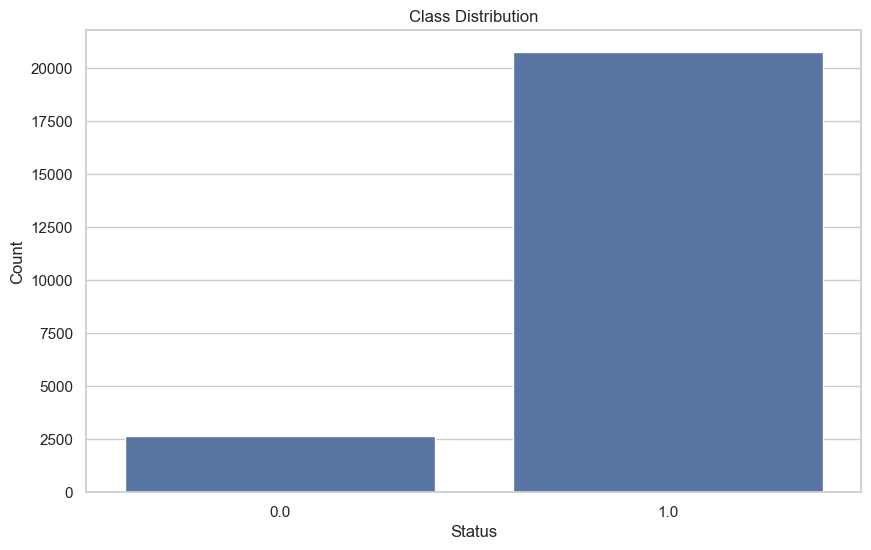

In [231]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=df)
plt.title('Class Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


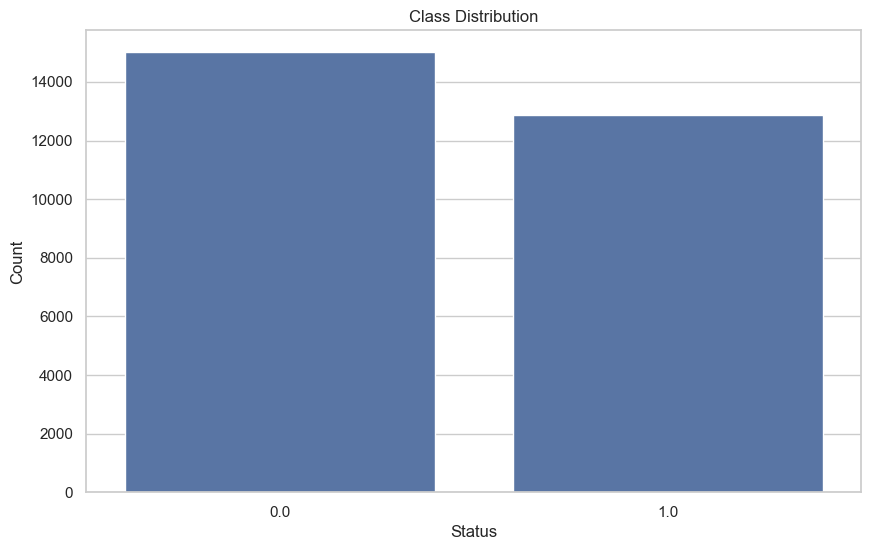

In [232]:
y_train_sm=pd.DataFrame(y_train_sm, columns=['Status'])
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=y_train_sm)
plt.title('Class Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [233]:
# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_sm, y_train_sm)

# Make predictions
y_pred = model.predict(X_test)

c:\Users\HP\OneDrive\Desktop\Project final\myenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [234]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       498
         1.0       1.00      1.00      1.00      4182

    accuracy                           1.00      4680
   macro avg       1.00      0.99      0.99      4680
weighted avg       1.00      1.00      1.00      4680



In [235]:
y_predT=model.predict(X_train_sm)

In [236]:
# Evaluate the model
print(classification_report(y_train_sm, y_predT)) # Use y_train_sm which contains the true labels instead of X_train_sm

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15011
         1.0       1.00      1.00      1.00     12879

    accuracy                           1.00     27890
   macro avg       1.00      1.00      1.00     27890
weighted avg       1.00      1.00      1.00     27890



In [237]:
import pickle

In [238]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [239]:
X_train_sm

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Type_Earthquake,Type_Explosion,Type_Nuclear Explosion,Type_Rock Burst,Magnitude Type_MB,...,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW
0,63.126,-150.9680,130.4,5.5,1.022784,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38.474,116.6080,29.7,6.1,1.022784,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-5.972,112.2250,598.0,6.7,1.022784,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.654,137.8540,15.0,6.2,1.022784,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-15.545,167.6320,125.0,5.6,1.022784,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27885,-19.548,-70.7269,10.0,5.6,1.040000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27886,-50.791,139.5050,9.9,6.3,1.400000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27887,-10.328,113.6210,25.5,5.6,1.200000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27888,-10.896,165.3790,10.0,6.3,1.310000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
